## 1. Install & load R packages

In [1]:
#data manipulation/exploration
library(readr)
library(tidyr)
library(scales)

# plotting
library(ggplot2)
library(viridis)
library(ggpubr)

#tables
library(dplyr)
library(stargazer)

options(jupyter.plot_mimetypes = c("text/plain","image/png"))


Attaching package: ‘scales’


The following object is masked from ‘package:readr’:

    col_factor


Loading required package: viridisLite


Attaching package: ‘viridis’


The following object is masked from ‘package:scales’:

    viridis_pal



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 




In [2]:
#file for outputs
path_f=paste(getwd(),"/Figures_and_tables/", sep="")
path_d=paste(getwd(),"/Data/", sep="")
#sizing in mm based on https://www.elsevier.com/authors/author-schemas/artwork-and-media-instructions/artwork-sizing
min_w=30
single.col_w= 90
half.col_w= 140
max_w= 190
max_h=240


## 2. Load & wrangle dataset

In [3]:
roc_inc<-read.csv(paste(path_d,"potable_reuse_full_dataset.csv", sep=""))      
roc_ro<- roc_inc[roc_inc$awtp_contains_RO == "Y",]
head(roc_ro)

,X,project,operational,city_AWTP,inland_coastal_40mi,state_region_provence,country,detail_PR_type,awtp_contains_RO,max_treatment_per_facility_RO,wwtp_effluent,advanced_treatment_detail_RO,upstream_RO,concentrate_treatment,RO_concentrate_management
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
29,29,Palm Beach County RECAP,N,Palm Beach,Coastal,FL,USA,groundwater,Y,"secondary, advanced, groundwater augmentation",secondary,"MF, RO, UV/AOP (unspecified)",MF,none reported,deep well injection
30,30,"Dominguez Gap Barrier Terminal Island, City of Los Angeles long Beach 3-4",Y,Los Angeles,Coastal,CA,USA,groundwater,Y,"tertiary, advanced, groundwater augmentation",tertiary,"MF, RO, UV/HOCl",MF,none reported,deep well injection; ocean discharge
31,31,Perth Groundwater Replenishment Scheme,Y,Perth,Coastal,Perth,Australia,groundwater,Y,"secondary, advanced, groundwater augmentation",secondary,"HOCl/NH4, UF, RO, UV",UF,neutralization tank (unspecified),ocean discharge
32,32,Aquaduin formerly Intermunicipal Water Company from the Veurne Region,Y,Koksijde,Coastal,West Flanders,Belgium,groundwater,Y,"secondary, advanced, groundwater augmentation",secondary,"HOCl, UF, HOCl/NH4, cartridge filtration, RO, UV/H2O2","UF, cartridge filtration",constructed wetland,ocean discharge
33,33,NEWater,Y,Singapore,Coastal,NA,Singapore,reservoir,Y,"secondary, advanced, reservoir augmentation",secondary,"HOCl/NH4, MF, RO, cartridge filtration, UV, HOCl/NH4",MF,none reported,ocean discharge
34,34,Beaufort West Municipality,Y,Beaufort West,Inland,Western Cape,South Africa,reservoir,Y,"secondary, advanced, reservoir augmentation",secondary,"HOCl, settling, HOCl, media filtration, UF, RO, UV/H2O2, HOCl",UF,maturation pond,unknown


## 3. Tables


In [4]:
# full table 
table_s1<- roc_inc[order(roc_inc$awtp_contains_RO, roc_inc$country,roc_inc$state_region_provence,roc_inc$city_AWTP ),c("city_AWTP", "state_region_provence", "country","operational","detail_PR_type","awtp_contains_RO")]
table_s1
unique(duplicated(table_s1)) #no repeats

name="TableS1.doc" #name the file
stargazer(table_s1,type="html", summary=FALSE, rownames=FALSE, out=paste(path_f,name, sep=""))

,city_AWTP,state_region_provence,country,operational,detail_PR_type,awtp_contains_RO
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Bangalore,Karnataka,India,N,reservoir,N
2,Leon,Guanajuato,Mexico,N,reservoir,N
3,Windhoek,Khomas,Namibia,Y,treated water,N
5,Bloemfontein,Free State,South Africa,N,treated water,N
4,Atlantis,Western Cape,South Africa,Y,groundwater,N
6,Cape Town,Western Cape,South Africa,N,groundwater,N
7,Langford,Essex,United Kingdom,Y,reservoir,N
15,Chino,CA,USA,Y,groundwater,N
23,San Bernardino,CA,USA,Y,groundwater,N


[1] FALSE


<table style="text-align:center"><tr><td colspan="6" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">city_AWTP</td><td>state_region_provence</td><td>country</td><td>operational</td><td>detail_PR_type</td><td>awtp_contains_RO</td></tr>
<tr><td colspan="6" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">Bangalore</td><td>Karnataka</td><td>India</td><td>N</td><td>reservoir</td><td>N</td></tr>
<tr><td style="text-align:left">Leon</td><td>Guanajuato</td><td>Mexico</td><td>N</td><td>reservoir</td><td>N</td></tr>
<tr><td style="text-align:left">Windhoek</td><td>Khomas</td><td>Namibia</td><td>Y</td><td>treated water</td><td>N</td></tr>
<tr><td style="text-align:left">Bloemfontein</td><td>Free State</td><td>South Africa</td><td>N</td><td>treated water</td><td>N</td></tr>
<tr><td style="text-align:left">Atlantis</td><td>Western Cape</td><td>South Africa</td><td>Y</td><td>groundwater</td><td>N</td></tr>
<tr><td style="text-align:l

In [5]:
# ro table "max_treatment_per_facility_RO",?
table_s4<- roc_ro[order(roc_ro$country,roc_ro$city_AWTP, roc_ro$max_treatment_per_facility_RO ),c("detail_PR_type","city_AWTP", "state_region_provence", "country","max_treatment_per_facility_RO", "advanced_treatment_detail_RO")]
table_s4<- table_s4[,c("city_AWTP", "state_region_provence", "country","max_treatment_per_facility_RO", "advanced_treatment_detail_RO")]

table_s4
unique(duplicated(table_s4)) #no repeats

name="TableS4.doc" #name the file
stargazer(table_s4,type="html", summary=FALSE, rownames=FALSE, out=paste(path_f,name, sep=""))

,city_AWTP,state_region_provence,country,max_treatment_per_facility_RO,advanced_treatment_detail_RO
,<chr>,<chr>,<chr>,<chr>,<chr>
31,Perth,Perth,Australia,"secondary, advanced, groundwater augmentation","HOCl/NH4, UF, RO, UV"
32,Koksijde,West Flanders,Belgium,"secondary, advanced, groundwater augmentation","HOCl, UF, HOCl/NH4, cartridge filtration, RO, UV/H2O2"
54,Paranaque,National Capital,Philippines,"secondary, advanced, treated water augmentation","media filtration, UF, RO, HOCl"
33,Singapore,NA,Singapore,"secondary, advanced, reservoir augmentation","HOCl/NH4, MF, RO, cartridge filtration, UV, HOCl/NH4"
55,Ballito,KwaZulu Natal,South Africa,"advanced, treated water augmentation","aeration basin, settling, HOCl, media filtration, UF, RO, HOCl, UV, HOCl"
34,Beaufort West,Western Cape,South Africa,"secondary, advanced, reservoir augmentation","HOCl, settling, HOCl, media filtration, UF, RO, UV/H2O2, HOCl"
35,Durban,KwaZulu-Natal,South Africa,"secondary, advanced, DPR (unspecified)","MBR, RO"
36,Barcelona,Barcelona,Spain,"secondary, advanced, groundwater augmentation","filtration (unspecified), UV, UF, RO"
53,Barcelona,Barcelona,Spain,"secondary, tertiary, reservoir augmentation, advanced","ClO2, coagulation, flocculation, media filtration, split: [ozone, GAC] or [UF, RO], recombine: HOCl"


[1] FALSE


<table style="text-align:center"><tr><td colspan="5" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">city_AWTP</td><td>state_region_provence</td><td>country</td><td>max_treatment_per_facility_RO</td><td>advanced_treatment_detail_RO</td></tr>
<tr><td colspan="5" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">Perth</td><td>Perth</td><td>Australia</td><td>secondary, advanced, groundwater augmentation</td><td>HOCl/NH4, UF, RO, UV</td></tr>
<tr><td style="text-align:left">Koksijde</td><td>West Flanders</td><td>Belgium</td><td>secondary, advanced, groundwater augmentation</td><td>HOCl, UF, HOCl/NH4, cartridge filtration, RO, UV/H2O2</td></tr>
<tr><td style="text-align:left">Paranaque</td><td>National Capital</td><td>Philippines</td><td>secondary, advanced, treated water augmentation</td><td>media filtration, UF, RO, HOCl</td></tr>
<tr><td style="text-align:left">Singapore</td><td></td><td>Singapore</td><td>secondary, advance

In [6]:
#pretreatment for biofouling
names(table_s4)

s4_separated <- table_s4 %>%
  separate(
    col = advanced_treatment_detail_RO,
    into = c("before_RO", "after_RO"),
    sep = "RO"
  )

s4_separated[grepl("HOCl", s4_separated$before_RO), ] # 3 monochloramine, 3 free chlorine 1 both
s4_separated[grepl("ClO2", s4_separated$before_RO), ] # only 1
s4_separated[grepl("ozone", s4_separated$before_RO), ] #barcelona does not count as the ozone is in a stream that does not go to RO, 3 ozone, 1 ozone/BAF

[1] "city_AWTP"                     "state_region_provence"        
[3] "country"                       "max_treatment_per_facility_RO"
[5] "advanced_treatment_detail_RO"

,city_AWTP,state_region_provence,country,max_treatment_per_facility_RO,before_RO,after_RO
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
31,Perth,Perth,Australia,"secondary, advanced, groundwater augmentation","HOCl/NH4, UF,",", UV"
32,Koksijde,West Flanders,Belgium,"secondary, advanced, groundwater augmentation","HOCl, UF, HOCl/NH4, cartridge filtration,",", UV/H2O2"
33,Singapore,NA,Singapore,"secondary, advanced, reservoir augmentation","HOCl/NH4, MF,",", cartridge filtration, UV, HOCl/NH4"
55,Ballito,KwaZulu Natal,South Africa,"advanced, treated water augmentation","aeration basin, settling, HOCl, media filtration, UF,",", HOCl, UV, HOCl"
34,Beaufort West,Western Cape,South Africa,"secondary, advanced, reservoir augmentation","HOCl, settling, HOCl, media filtration, UF,",", UV/H2O2, HOCl"
45,Santa Cruz,CA,USA,"secondary, advanced, groundwater augmentation","HOCl, ozone, MF,",", UV/H2O2, HOCl"


,city_AWTP,state_region_provence,country,max_treatment_per_facility_RO,before_RO,after_RO
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
53,Barcelona,Barcelona,Spain,"secondary, tertiary, reservoir augmentation, advanced","ClO2, coagulation, flocculation, media filtration, split: [ozone, GAC] or [UF,","], recombine: HOCl"


,city_AWTP,state_region_provence,country,max_treatment_per_facility_RO,before_RO,after_RO
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
53,Barcelona,Barcelona,Spain,"secondary, tertiary, reservoir augmentation, advanced","ClO2, coagulation, flocculation, media filtration, split: [ozone, GAC] or [UF,","], recombine: HOCl"
41,Monterey,CA,USA,"secondary, advanced, groundwater augmentation","ozone, membrane filtration (unspecified),",", UV/H2O2, HOCl/NH4"
49,San Diego,CA,USA,"tertiary, advanced, reservoir augmentation","ozone/BAF, UF,",", UV/HOCl"
45,Santa Cruz,CA,USA,"secondary, advanced, groundwater augmentation","HOCl, ozone, MF,",", UV/H2O2, HOCl"
57,Scottsdale,AZ,USA,"tertiary, advanced, groundwater augmentation","ozone, UF,",", UV"


In [7]:
# ro table "max_treatment_per_facility_RO",?
table_s2<- roc_ro[order(roc_ro$inland_coastal_40mi, roc_ro$RO_concentrate_management, roc_ro$country,roc_ro$state_region_provence,roc_ro$city_AWTP),c( "city_AWTP", "state_region_provence", "country", "inland_coastal_40mi", "upstream_RO", "concentrate_treatment", "RO_concentrate_management")]
table_s2
unique(duplicated(table_s2)) #no repeats
write.csv(table_s2, paste(path_f,"table_S2.csv"), sep="")
name="TableS2.doc" #name the file
stargazer(table_s2,type="html", summary=FALSE, rownames=FALSE, out=paste(path_f,name, sep=""))

,city_AWTP,state_region_provence,country,inland_coastal_40mi,upstream_RO,concentrate_treatment,RO_concentrate_management
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
29,Palm Beach,FL,USA,Coastal,MF,none reported,deep well injection
30,Los Angeles,CA,USA,Coastal,MF,none reported,deep well injection; ocean discharge
31,Perth,Perth,Australia,Coastal,UF,neutralization tank (unspecified),ocean discharge
32,Koksijde,West Flanders,Belgium,Coastal,"UF, cartridge filtration",constructed wetland,ocean discharge
33,Singapore,NA,Singapore,Coastal,MF,none reported,ocean discharge
35,Durban,KwaZulu-Natal,South Africa,Coastal,MBR,none reported,ocean discharge
36,Barcelona,Barcelona,Spain,Coastal,UF,none reported,ocean discharge
37,El Segundo,CA,USA,Coastal,MF,none reported,ocean discharge
41,Monterey,CA,USA,Coastal,membrane filtration (unspecified),none reported,ocean discharge


[1] FALSE

Warning message in write.csv(table_s2, paste(path_f, "table_S2.csv"), sep = ""):
“attempt to set 'sep' ignored”



<table style="text-align:center"><tr><td colspan="7" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">city_AWTP</td><td>state_region_provence</td><td>country</td><td>inland_coastal_40mi</td><td>upstream_RO</td><td>concentrate_treatment</td><td>RO_concentrate_management</td></tr>
<tr><td colspan="7" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">Palm Beach</td><td>FL</td><td>USA</td><td>Coastal</td><td>MF</td><td>none reported</td><td>deep well injection</td></tr>
<tr><td style="text-align:left">Los Angeles</td><td>CA</td><td>USA</td><td>Coastal</td><td>MF</td><td>none reported</td><td>deep well injection; ocean discharge</td></tr>
<tr><td style="text-align:left">Perth</td><td>Perth</td><td>Australia</td><td>Coastal</td><td>UF</td><td>neutralization tank (unspecified)</td><td>ocean discharge</td></tr>
<tr><td style="text-align:left">Koksijde</td><td>West Flanders</td><td>Belgium</td><td>Coastal</td><td>UF, cartridge filt

## 4. Figures

In [8]:
# numbers used in the manuscript
#number of PR facilities looked into
tot<-length(roc_inc$country)
tot
#percent that use RO
yes_ro<-length(roc_inc[roc_inc$awtp_contains_RO == "Y",]$country)
no_ro<-length(roc_inc[roc_inc$awtp_contains_RO == "N",]$country)
yes_ro+no_ro == tot
yes_ro/tot #percent using RO
yes_ro

[1] 57

[1] TRUE

[1] 0.5087719

[1] 29

In [9]:
unique(roc_inc$country)

[1] "India"          "Mexico"         "Namibia"        "South Africa"  
 [5] "United Kingdom" "USA"            "Australia"      "Belgium"       
 [9] "Singapore"      "Spain"          "Philippines"

In [10]:
#for pie charts following https://www.sthda.com/english/wiki/ggplot2-pie-chart-quick-start-guide-r-software-and-data-visualization

blank_theme <- theme_minimal()+
  theme(
  axis.title.x = element_blank(),
  axis.title.y = element_blank(),
  panel.border = element_blank(),
  panel.grid=element_blank(),
  axis.ticks = element_blank(),
  plot.title=element_text(size=14, face="bold")
  )

[1] 30

Scale for size is already present.
Adding another scale for size, which will replace the existing scale.


pdf 
  2

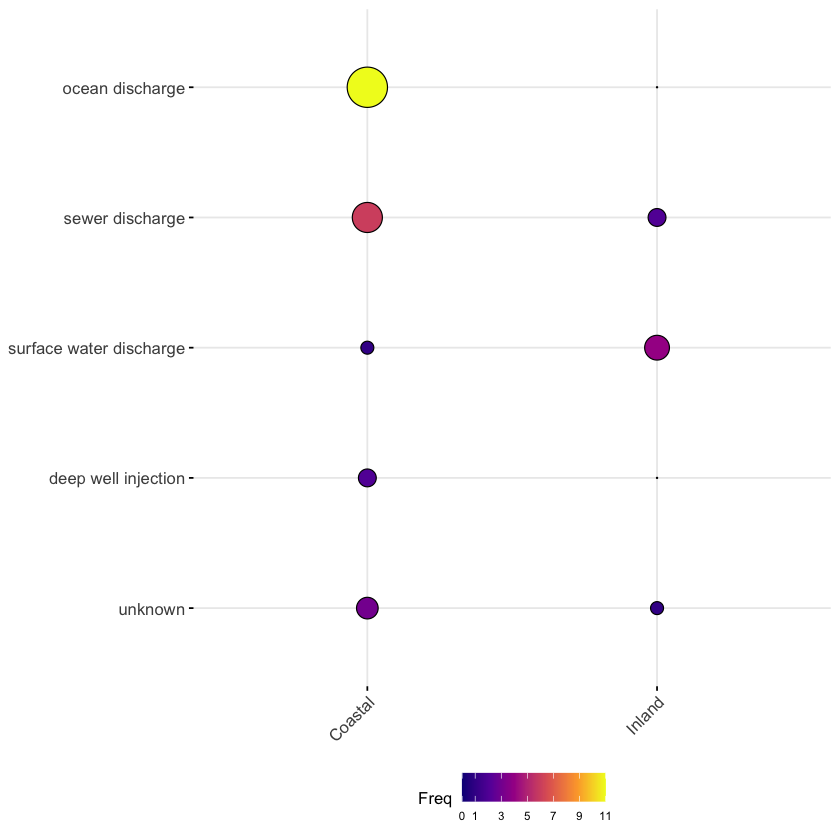

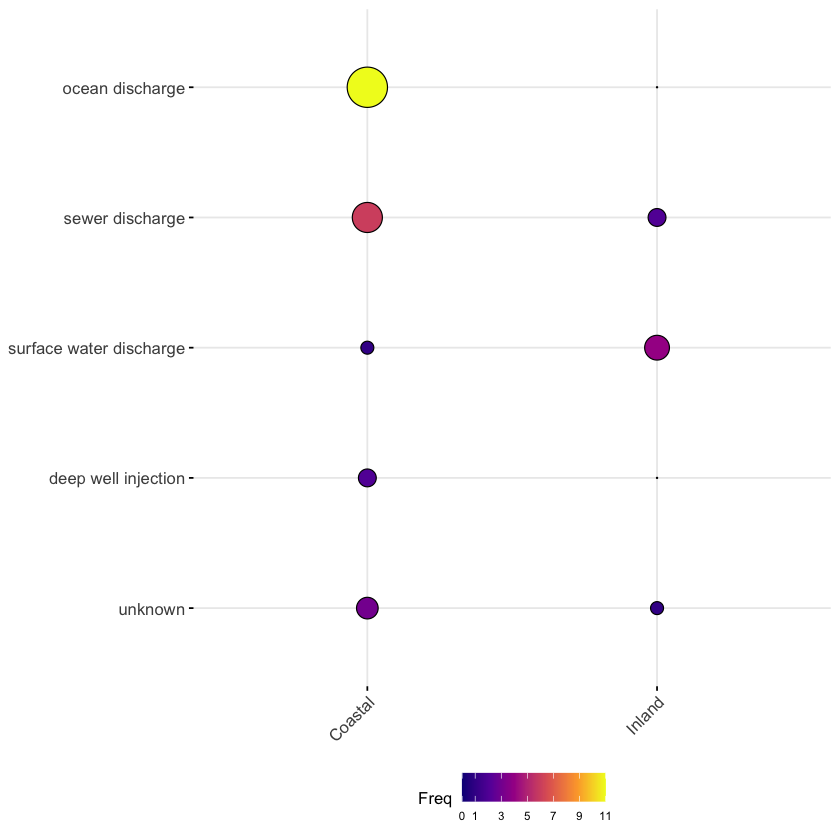

In [22]:
management<- roc_ro[,c("RO_concentrate_management","inland_coastal_40mi")]
expanded_mgmt <- separate_longer_delim(management, cols = RO_concentrate_management, delim = ";")
expanded_mgmt[expanded_mgmt$RO_concentrate_management ==" ocean discharge", "RO_concentrate_management"] <-"ocean discharge"
contingency_mgmt <- as.data.frame(t(table(expanded_mgmt)))
contingency_mgmt$RO_concentrate_management <- factor(contingency_mgmt$RO_concentrate_management, levels = c("ocean discharge", "sewer discharge",  "surface water discharge","deep well injection", "unknown"))
sum(contingency_mgmt$Freq) # only 29 facilities but 1 has 2 practices

g<-ggballoonplot(contingency_mgmt, fill = "value")+
  scale_fill_viridis_c(option = "C",  breaks=c(0,1,3,5,7,9,11),limits = c(0, 11))+
scale_size_continuous(limits = c(0, 11), range = c(0, 11), breaks=c(0,1,3,5,7,9,11))+
guides(size = "none")+
theme(axis.text.x=element_text(size=10), axis.text.y=element_text(size=10),legend.text = element_text(size=7), legend.position = "bottom",legend.title = element_text(size=10))

  
ggsave(paste0(path_f,"Figure_1.jpg"),  units='mm',device= 'jpg',width=half.col_w/1.6, height=half.col_w/1.5)
g
ragg::agg_tiff(paste0(path_f,"Figure_1.tiff"),  width=half.col_w/1.6, height=half.col_w/1.5, units='mm', res = 1000)
g
dev.off()
g


In [12]:
table_s3 <-as.data.frame.matrix(table(expanded_mgmt))
table_s3

name="TableS3.doc" #name the file
stargazer(table_s3,type="html", summary=FALSE, rownames=TRUE, out=paste(path_f,name, sep=""))

,Coastal,Inland
,<int>,<int>
deep well injection,2,0
ocean discharge,11,0
sewer discharge,6,2
surface water discharge,1,4
unknown,3,1



<table style="text-align:center"><tr><td colspan="3" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left"></td><td>Coastal</td><td>Inland</td></tr>
<tr><td colspan="3" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">deep well injection</td><td>2</td><td>0</td></tr>
<tr><td style="text-align:left">ocean discharge</td><td>11</td><td>0</td></tr>
<tr><td style="text-align:left">sewer discharge</td><td>6</td><td>2</td></tr>
<tr><td style="text-align:left">surface water discharge</td><td>1</td><td>4</td></tr>
<tr><td style="text-align:left">unknown</td><td>3</td><td>1</td></tr>
<tr><td colspan="3" style="border-bottom: 1px solid black"></td></tr></table>


[1] 31

pdf 
  2

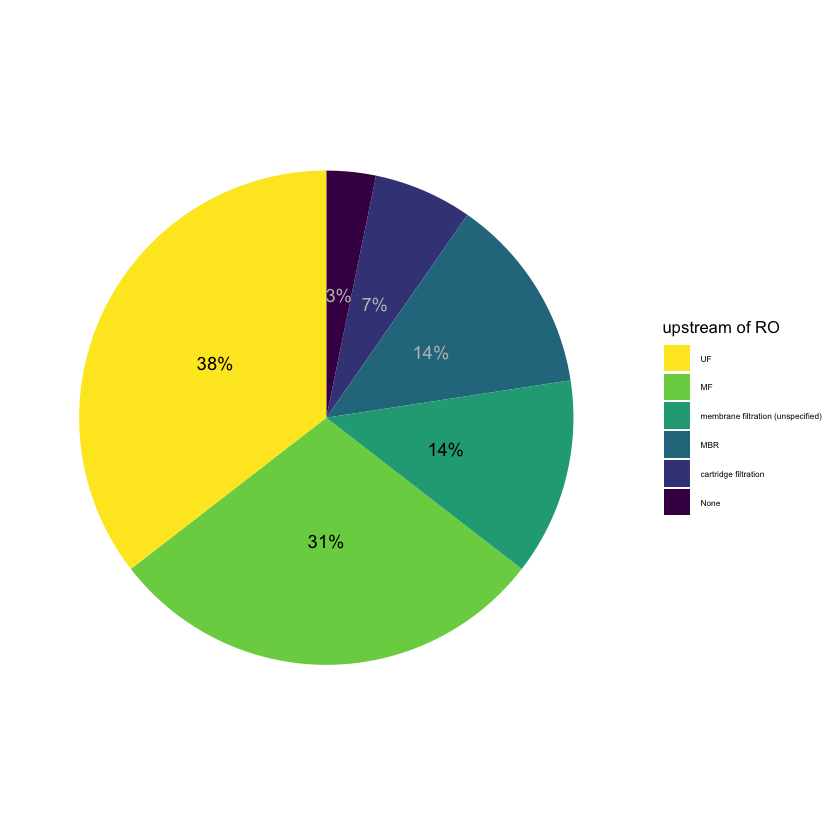

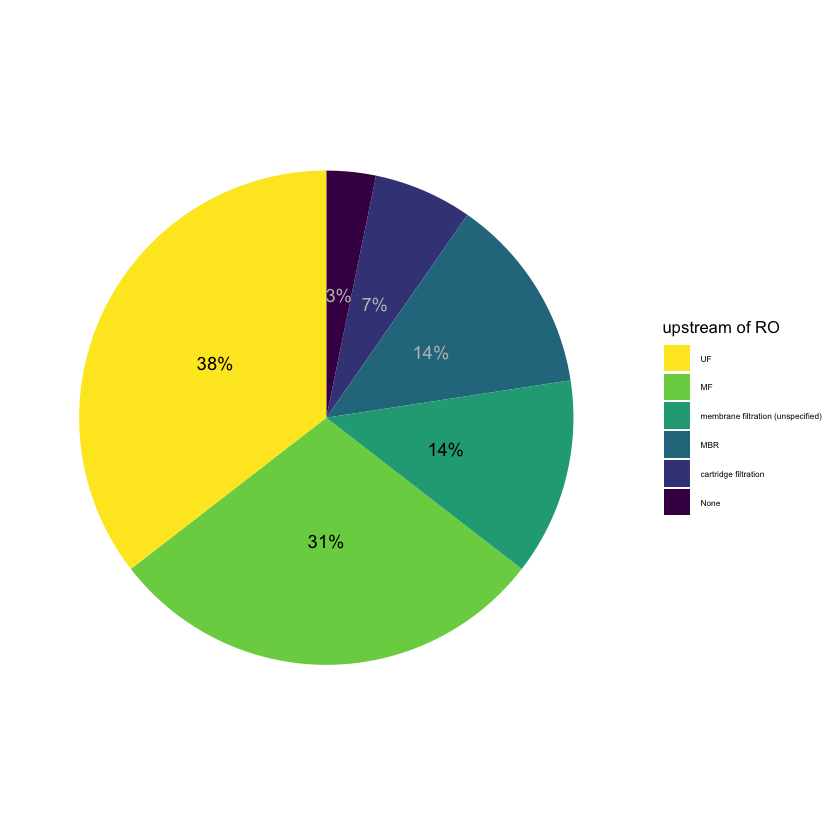

In [13]:
pretreatment<- roc_ro$upstream_RO

#some contained multiple membrane pretreatment processes, so treat as multiple
expand <- function(x) {
  if (grepl(",", x)) { 
    strsplit(x, ",")[[1]] 
  } else {
    x 
  }
}

# Apply the function to each element of the list
pretreatment_expanded <- unlist(lapply(pretreatment, expand))
pretreatment_expanded_df<-as.data.frame(pretreatment_expanded)
colnames(pretreatment_expanded_df) <- "upstream_RO"
length(pretreatment_expanded)
pretreatment_RO<- pretreatment_expanded_df %>% group_by(upstream_RO) %>% summarize(value= as.numeric(n()))
pretreatment_RO_tot<- length(roc_inc[roc_inc$awtp_contains_RO == "Y",]$country)
pretreatment_RO$value<-(pretreatment_RO$value/pretreatment_RO_tot)*100
pretreatment_RO[pretreatment_RO$upstream_RO ==" cartridge filtration", "upstream_RO"] <-"cartridge filtration"
pretreatment_RO$upstream_RO <- factor(pretreatment_RO$upstream_RO, levels = c("UF", "MF",  "membrane filtration (unspecified)","MBR", "cartridge filtration", "None"))


g<-ggplot(pretreatment_RO, aes(x="", y=value, fill=upstream_RO))+
geom_bar(width = 1, stat = "identity") + coord_polar("y")+
  scale_fill_viridis_d(direction=-1)+ blank_theme +
  labs(fill = "upstream of RO")+
  theme(axis.text.x=element_blank(), legend.text = element_text(size=5), legend.title = element_text(size=10))+
geom_text(aes(label = paste0(round(value), "%")), 
              position = position_stack(vjust = 0.5),color = c("gray", "gray","black","gray","black","black")) 
  
ggsave(paste0(path_f,"Figure_2.jpg"),  units='mm',device= 'jpg',width=max_w, height=max_w)
g
ragg::agg_tiff(paste0(path_f,"Figure_2.tiff"),  width=half.col_w, height=half.col_w, units='mm', res = 1000)
g
dev.off()
g

In [14]:
roc_ro$has_ozone <- grepl("ozone,", roc_ro$advanced_treatment_detail_RO)
roc_ro$has_ozone_BAF <- grepl("ozone/BAF", roc_ro$advanced_treatment_detail_RO)
sum(roc_ro$has_ozone )
sum(roc_ro$has_ozone_BAF )

[1] 4

[1] 2